# Business Sales Performance Analysis  
### Data Science & Analytics Internship – Future Interns  
Author: Kumar Ansh Prasad


In [1]:
import pandas as pd

df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Basic Understanding

In [4]:
df.shape


(9994, 21)

In [5]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
#Missing Values Check

In [8]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
#Date Format Fix

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month_Name
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,October


In [11]:
#Calculate KPIs

In [12]:
total_revenue = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
avg_order_value = total_revenue / total_orders

print("Total Revenue:", round(total_revenue,2))
print("Total Profit:", round(total_profit,2))
print("Total Orders:", total_orders)
print("Average Order Value:", round(avg_order_value,2))


Total Revenue: 2297200.86
Total Profit: 286397.02
Total Orders: 5009
Average Order Value: 458.61


In [13]:
#Monthly Revenue Trend

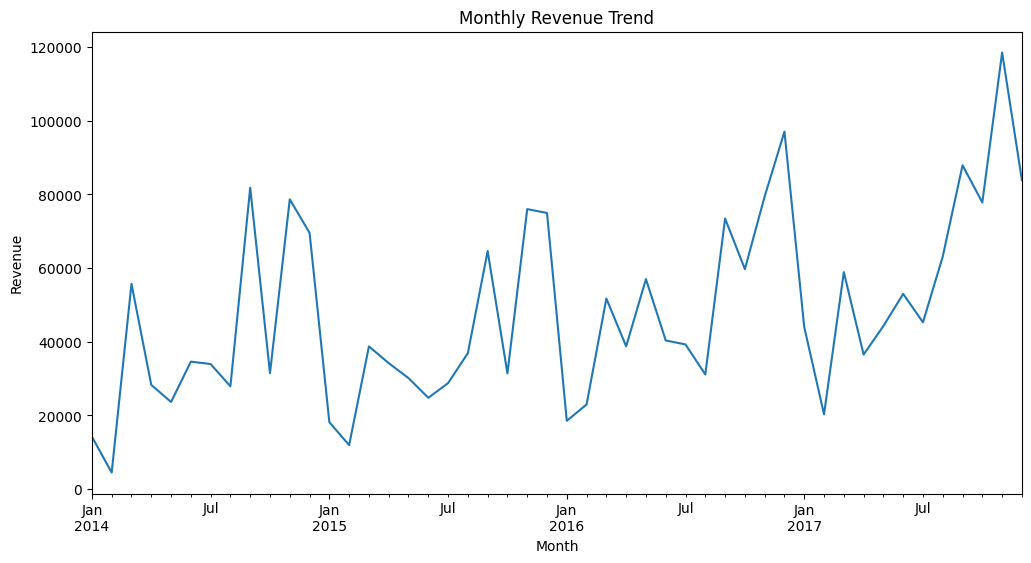

In [14]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [15]:
#Top 10 Products by Revenue

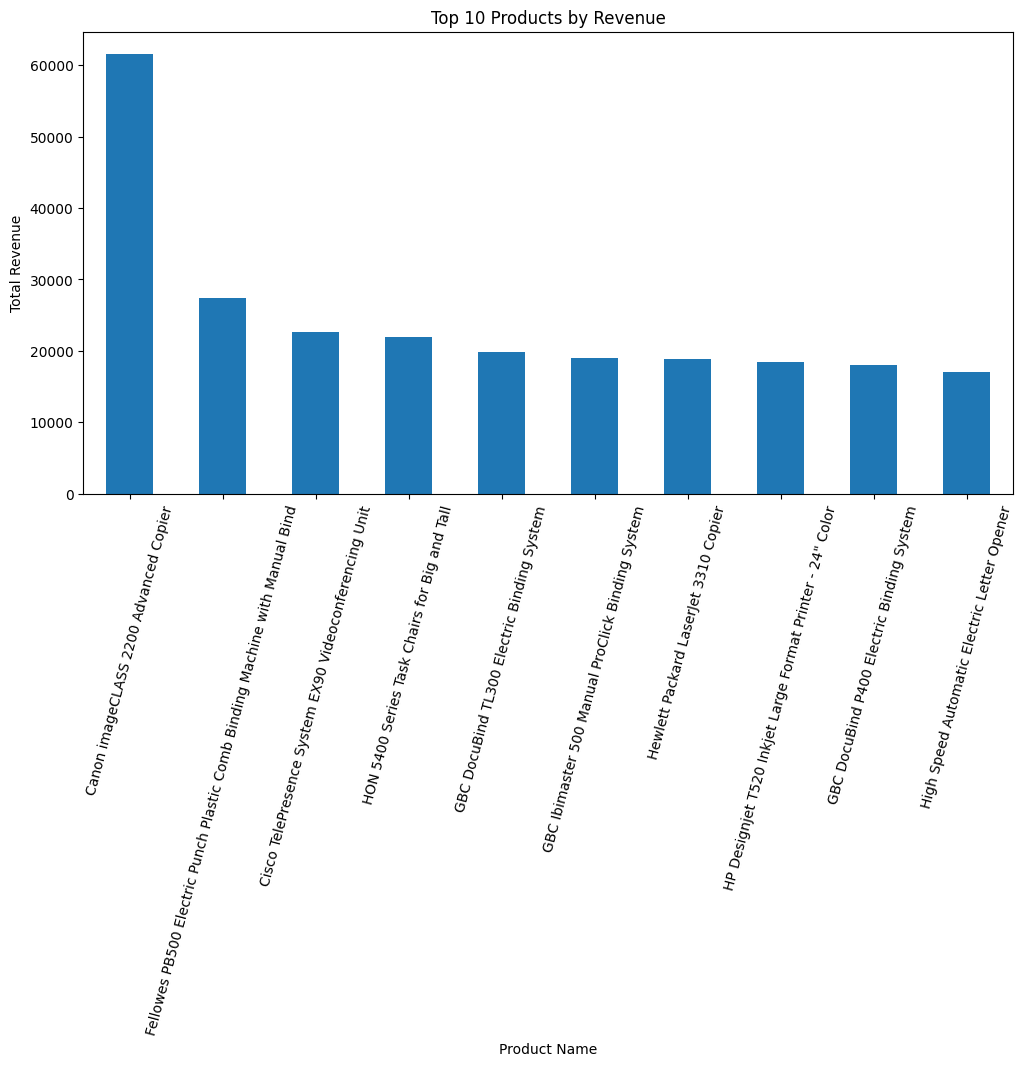

In [16]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Total Revenue")
plt.xticks(rotation=75)
plt.show()


In [17]:
#Top 10 Products by Profit

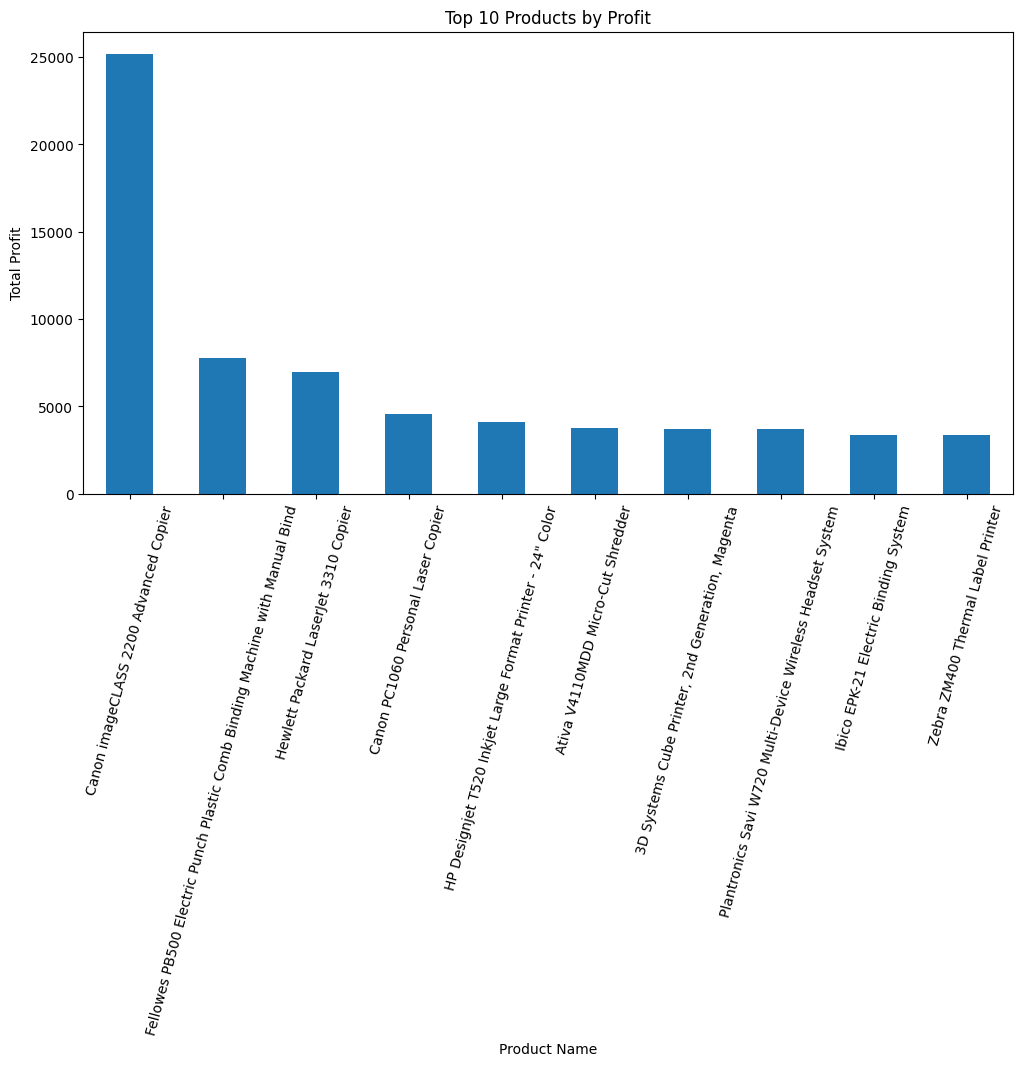

In [18]:
top_profit_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_profit_products.plot(kind='bar')
plt.title("Top 10 Products by Profit")
plt.ylabel("Total Profit")
plt.xticks(rotation=75)
plt.show()


In [19]:
#Sales by Category

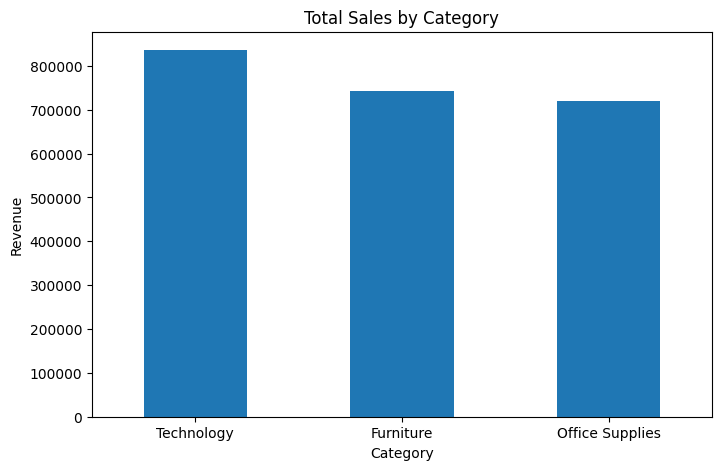

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

In [20]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title("Total Sales by Category")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.show()

category_sales


In [21]:
#Profit Margin %

In [22]:
category_summary = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})

category_summary['Profit_Margin_%'] = (category_summary['Profit'] / category_summary['Sales']) * 100

category_summary.sort_values(by='Profit_Margin_%', ascending=False)


,Sales,Profit,Profit_Margin_%
Category,,,
Technology,836154.0330,145454.9481,17.395712
Office Supplies,719047.0320,122490.8008,17.035158
Furniture,741999.7953,18451.2728,2.486695


In [23]:
#Profit by Category 

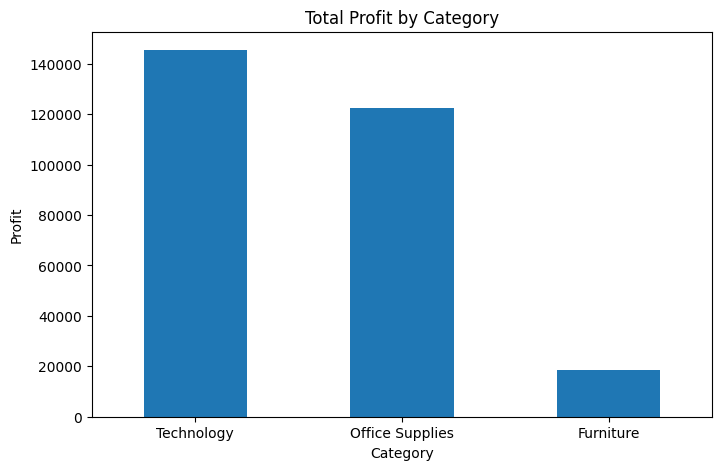

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

In [24]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_profit.plot(kind='bar')
plt.title("Total Profit by Category")
plt.ylabel("Profit")
plt.xticks(rotation=0)
plt.show()

category_profit


In [25]:
#Sales by Region 

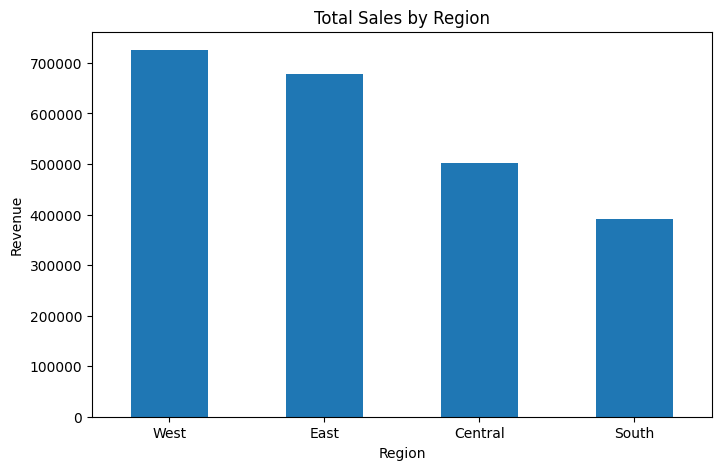

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

In [26]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar')
plt.title("Total Sales by Region")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.show()

region_sales


In [27]:
#Profit By Region

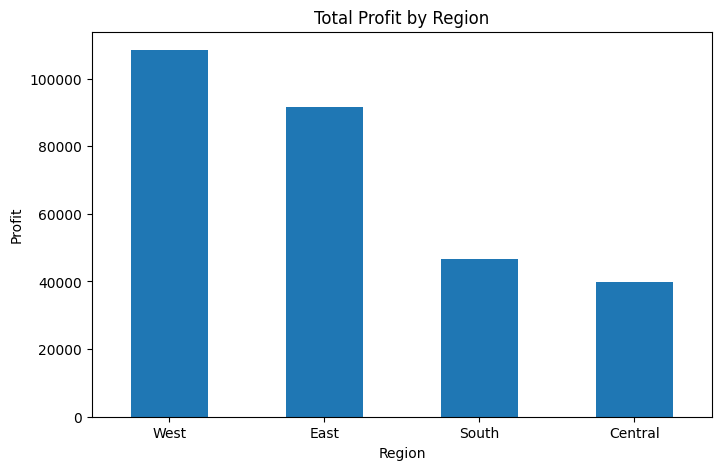

Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

In [28]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
region_profit.plot(kind='bar')
plt.title("Total Profit by Region")
plt.ylabel("Profit")
plt.xticks(rotation=0)
plt.show()

region_profit


In [29]:
#Profit Margin by Region

In [30]:
region_summary = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})

region_summary['Profit_Margin_%'] = (region_summary['Profit'] / region_summary['Sales']) * 100

region_summary.sort_values(by='Profit_Margin_%', ascending=False)


,Sales,Profit,Profit_Margin_%
Region,,,
West,725457.8245,108418.4489,14.944831
East,678781.2400,91522.7800,13.483399
South,391721.9050,46749.4303,11.934342
Central,501239.8908,39706.3625,7.921629


## Key Business Insights

1. The West region generates the highest revenue and profit.
2. The East region also performs strongly with solid profit margins.
3. The Central region has the lowest profit margin (around 7.9%), indicating potential cost or pricing issues.
4. Overall profit margin varies significantly across regions.
5. Revenue is strong, but profitability can be improved with better margin optimization.


## Strategic Recommendations

1. Focus expansion efforts in West and East regions to maximize revenue growth.
2. Investigate cost structure in Central region to improve profit margins.
3. Optimize pricing strategies for low-margin segments.
4. Promote high-margin products more aggressively.
5. Use seasonal sales trends to plan targeted marketing campaigns.
